In [1]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [2]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [3]:
import collect_stats as cs

In [317]:
exp_folder = '/cluster/sj1/bb_opt/experiments'
test_filepath = '/cluster/sj1/bb_opt/data/tatsu_pbm/test_files'
filedir = '/cluster/sj1/bb_opt/data/paper_data2'
num_tfs_to_test = 38
batches = [10, 100, 200]
num_acks = 30

In [5]:
with open(test_filepath, 'r') as f:
    filenames = [k.strip() for k in f.readlines()][:num_tfs_to_test]

In [6]:
def sigmoid(x, exp=np.exp):
  return 1.0 / (1.0 + exp(-x))

In [428]:
filenames = ['malaria']

In [486]:
filenames = [
    'HESX1_E149K_R1_8mers.txt',
    'EGR2_D383Y_R1_8mers.txt',
    'BCL6_H676Y_R1_8mers.txt',
    'ARX_L343Q_R1_8mers.txt',
    'CRX_E80A_R1_8mers.txt',
    'ESX1_K193R_R1_8mers.txt',
    'FOXC1_F112S_R1_8mers.txt',
    'GFI1B_A204T_R1_8mers.txt',
    'GFI1_L400F_R1_8mers.txt',
    'HOXC4_N178S_R1_8mers.txt',
    'HOXD13_I322L_R1_8mers.txt',
    'ISX_R83Q_R1_8mers.txt',
    'KLF11_R402Q_R1_8mers.txt',
    'KLF1_E325K_R1_8mers.txt',
    'MSX2_P148H_R1_8mers.txt',
    'NKX2-5_K183E_R1_8mers.txt',
    'NR1H4_C144R_R1_8mers.txt',
    'NR2E3_G56R_R1_8mers.txt',
    'OVOL2_D228E_R1_8mers.txt',
    'PAX3_G48R_R1_8mers.txt',
    'PAX4_R183C_R1_8mers.txt',
    'PAX6_A79E_R1_8mers.txt',
    'PAX7_P112L_R1_8mers.txt',
    'PBX4_R215Q_R1_8mers.txt',
    'PHOX2B_Q143R_R1_8mers.txt',
    'PITX2_L100Q_R1_8mers.txt',
    'POU3F4_A237G_R1_8mers.txt',
    'POU4F3_K277R_R1_8mers.txt',
    'POU6F2_E639K_R1_8mers.txt',
    'PROP1_R112Q_R1_8mers.txt',
    'SIX6_H141N_R1_8mers.txt',
    'SNAI2_D119E_R1_8mers.txt',
    'VAX2_L139M_R1_8mers.txt',
    'VENTX_E101K_R1_8mers.txt',
    'VSX1_G160D_R1_8mers.txt',
    'WT1_F392L_R1_8mers.txt',
    'ZNF200_H322Y_R1_8mers.txt',
    'ZNF655_E327G_R1_8mers.txt',
]

In [8]:
tf_max = {}
tf_labels = {}
for tf in filenames:
    labels = np.load(filedir + "/" + tf + "/labels.npy")
    labels = np.log(labels)
    tf_max[tf] = float(labels.max())
    tf_labels[tf] = labels

In [12]:
arrs = {}

In [400]:
to_read = {
    #'ensemble7/o_none_ucb_modelseed_': [None, 'e7'],
    #'ensemble7/o_none_ucb_ucb_step_0.1_modelseed_': [None, 'e7_ucb_step_0.1'],
    #'ensemble7/o_none_ucb_maxvar_g000510204080_modelseed_': [None, 'e7_maxvar_g80'],
    #'ensemble7/o_none_ucb_maxinoutvar_g000510204080_modelseed_': [None, 'e7_inoutvar_g80'],
    #'ensemble7/o_none_ucb_maxinvar_g000510204080_modelseed_': [None, 'e7_invar_g80'],
    #'ensemble7/o_none_ucb_dataseed_modelseed_': [None, 'e7_datarand'],
    #'ensemble7/o_none_ucb_invar_g000510204080_dataseed_modelseed_' : [None, 'e7_datarand_invar_g80'],
    #'ensemble7/o_none_ucb_maxvar_g000510204080_dataseed_modelseed_' : [None, 'e7_datarand_maxvar_g80'],
    #'ensemble7/o_none_ucb_inoutvar_g000510204080_dataseed_modelseed_': [None, 'e7_datarand_inoutvar_g80'],
    #'ensemble9/o_none_ucb_modelseed_': [None, 'e9'],
    #'ensemble9/o_none_ucb_maxvar_g000510204080_modelseed_': [None, 'e9_maxvar_g80'],
    #'ensemble9/o_none_ucb_maxinvar_g000510204080_modelseed_': [None, 'e9_invar_g80'],
    #'ensemble9/o_none_ucb_maxinoutvar_g000510204080_modelseed_': [None, 'e9_inoutvar_g80'],
    #'ensemble7/o_kriging_believer_kb_modelseed_': [None, 'e7_kb'],
    #'ensemble7/o_empirical_kb_div_3_modelseed_': [None, 'e7_empirical_kb'],
    #'ensemble7/o_empirical_kb_ucb_weighted_div_10_modelseed_': [None, 'e7_wekb_div10'],
    #'ensemble7/o_empirical_kb_ucb_weighted_0.5_div_10_modelseed_': [None, 'e7_wekb_0.5_div10'],
    #'ensemble7/o_empirical_kb_ucb_weighted_mean_0.5_div_10_modelseed_': [None, 'e7_wekb_mean_0.5_div10'],
    #'ensemble7/o_kb_dataseed_modelseed_': [None, 'e7_datarand_kb'],
    #'ensemble10/o_kb_dataseed_modelseed_': [None, 'e10_datarand_kb'],
    #'ensemble10/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'e10_datarand_wekb_div10'],
    #'ensemble11/o_kb_dataseed_modelseed_': [None, 'e11_datarand_kb'],
    #'ensemble11/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'e11_datarand_wekb_div10'],
    #'ensemble11/o_kb_malaria_dataseed_modelseed_': [None, 'mal_datarand_kb'],
    'ensemble11/o_empirical_kb_malaria_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'mal_datarand_wekb_div10'],
    #'ensemble11/o_kb_nolog_malaria_dataseed_modelseed_': [None, 'mal_datarand_kb_nolog'],
}

In [401]:
for k in to_read:
    arrs[k] = to_read[k]
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_samples=50)

reading ensemble11/o_empirical_kb_malaria_ucb_weighted_0.5_div_10_dataseed_modelseed_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10
reading sample 11
reading sample 12
reading sample 13
reading sample 14
reading sample 15
reading sample 16
reading sample 17
reading sample 18
reading sample 19
reading sample 20
reading sample 21
reading sample 22
reading sample 23
reading sample 24
reading sample 25
reading sample 26
reading sample 27
reading sample 28
reading sample 29
reading sample 30
reading sample 31
reading sample 32
reading sample 33
reading sample 34
reading sample 35
reading sample 36
reading sample 37
reading sample 38
reading sample 39
reading sample 40
reading sample 41
reading sample 42
reading sample 43
reading sample 44
reading sample 45
reading sample 46
reading sample 47
reading sample 48
reading sample 49
reading sample 50


In [470]:
to_eval = [
    'ensemble7/o_none_ucb_modelseed_',
    'ensemble7/o_none_ucb_maxvar_g000510204080_modelseed_',
    'ensemble7/o_none_ucb_maxinvar_g000510204080_modelseed_',
    'ensemble7/o_none_ucb_maxinoutvar_g000510204080_modelseed_',
    'ensemble7/o_none_ucb_dataseed_modelseed_',
    'ensemble7/o_none_ucb_invar_g000510204080_dataseed_modelseed_',
    'ensemble7/o_none_ucb_maxvar_g000510204080_dataseed_modelseed_',
    'ensemble7/o_none_ucb_inoutvar_g000510204080_dataseed_modelseed_',
    'ensemble7/o_kriging_believer_kb_modelseed_',
    'ensemble7/o_empirical_kb_ucb_weighted_0.5_div_10_modelseed_',
    'ensemble7/o_empirical_kb_ucb_weighted_mean_0.5_div_10_modelseed_',
    'ensemble7/o_kb_dataseed_modelseed_',
    'ensemble10/o_kb_dataseed_modelseed_',
    'ensemble10/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_',
    'ensemble11/o_kb_dataseed_modelseed_',
    'ensemble11/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_',
    'ensemble11/o_kb_malaria_dataseed_modelseed_',
    'ensemble11/o_empirical_kb_malaria_ucb_weighted_0.5_div_10_dataseed_modelseed_',
]

In [16]:
idx_data_extractor = lambda x, filename : x['idx_frac'][0].item()

In [328]:
ack_rel_opt_val_data_extractor = lambda x, filename : x['ack_rel_opt_value']

In [475]:
train_rmse_fn = lambda x, filename : x['logging'][1]['train']['std']

In [296]:
def ir_regret_fn(x, filename): 
    temp = x['ir_batch_cur_idx'].numpy().tolist()
    temp2 = set(x['ack_idx'].numpy().tolist())
    temp3 = None
    for k in temp[::-1]:
        if k not in temp2:
            break
    return np.exp(max(tf_labels[filename][k], tf_labels[filename][x['ack_idx']].max()))

def ack_regret_fn(x, filename): 
    return np.exp(tf_labels[filename][x['ack_idx']].max())



In [485]:
cs.prop_test(10, 
             filenames, 
             train_rmse_fn, 
             arrs, 
             [to_eval[6], to_eval[7]],
             29, 
             pval_threshold=0.4, 
             paired_test=True,
            )

comparing e7_datarand_maxvar_g80 e7_datarand_inoutvar_g80
BCL6_H676Y_R1_8mers.txt 0.1462764919244586 0.022632339876145123 0.021156287845224143 0
ARX_L343Q_R1_8mers.txt 0.27547084491579055 0.02682799771428108 0.025161232519894838 0
CRX_E80A_R1_8mers.txt 0.31054291900521347 0.02482725977897644 0.0236034931614995 0
FOXC1_F112S_R1_8mers.txt 0.3197747915166563 0.027443579118698835 0.02614315701648593 0
ISX_R83Q_R1_8mers.txt 0.2322523237301228 0.029785577300935985 0.01887590140104294 0
KLF11_R402Q_R1_8mers.txt 0.0009624168851125889 0.02583533637225628 0.02133851065300405 0
MSX2_P148H_R1_8mers.txt 0.32669288464325874 0.017982990480959415 0.024167169397696853 1
NR1H4_C144R_R1_8mers.txt 0.38789660017574645 0.0221976981498301 0.021406997833400963 0
NR2E3_G56R_R1_8mers.txt 0.10587497616116673 0.026906041707843543 0.025254532881081104 0
OVOL2_D228E_R1_8mers.txt 0.13197000949142637 0.023983578011393548 0.022461248468607663 0
PAX3_G48R_R1_8mers.txt 0.34432698983618826 0.024640647508203984 0.02305938

In [232]:
cs.prop_test(10, 
             filenames, 
             ack_regret_fn, 
             arrs, 
             [to_eval[5], to_eval[7]], 
             29, 
             pval_threshold=0.3, 
             paired_test=True,
            )

comparing e7_datarand_invar_g80 e7_datarand_inoutvar_g80
HESX1_E149K_R1_8mers.txt 0.19814501871343357 9.877698 9.934259 1
EGR2_D383Y_R1_8mers.txt 0.166962500823848 10.909144 11.066843 1
GFI1B_A204T_R1_8mers.txt 0.23622175453093786 11.878399 11.895475 1
HOXD13_I322L_R1_8mers.txt 0.25054892487013414 12.65056 12.633457 0
ISX_R83Q_R1_8mers.txt 0.10364312776985575 13.174167 13.100253 0
KLF11_R402Q_R1_8mers.txt 0.020991504670164817 10.988746 10.990595 1
MSX2_P148H_R1_8mers.txt 0.16254999902972708 12.05761 12.060236 1
NKX2-5_K183E_R1_8mers.txt 0.09647496645004047 10.3419285 10.275088 0
NR2E3_G56R_R1_8mers.txt 0.12135217601064176 8.657245 8.669474 1
PAX6_A79E_R1_8mers.txt 0.22917619540038292 10.460765 10.461324 1
PBX4_R215Q_R1_8mers.txt 0.07923597091963203 9.705025 9.709104 1
POU3F4_A237G_R1_8mers.txt 0.29234379652019266 11.752149 11.749507 0
PROP1_R112Q_R1_8mers.txt 0.020991504670164817 12.318077 12.318184 1
SIX6_H141N_R1_8mers.txt 0.11086025530317307 11.852015 11.898707 1
combined pval: 0.07

In [325]:
cs.prop_test(100, 
             filenames, 
             idx_data_extractor, 
             arrs, 
             [to_eval[-2], to_eval[-1]], 
             9,
             pval_threshold=0.2,
             paired_test=True,
            )

comparing mal_datarand_kb mal_datarand_wekb_div10
malaria 0.13264918199156783 0.7185185223817825 0.7301587283611297 1
combined pval: nan vs 0.13265
count: 1/1


In [297]:
cs.prop_test(100, filenames, ir_regret_fn, arrs, [to_eval[-2], to_eval[-1]], 9, pval_threshold=0.2, paired_test=True)

comparing e11_datarand_kb e11_datarand_wekb_div10
EGR2_D383Y_R1_8mers.txt 0.08281384258450995 93853.98 91911.29 0
GFI1B_A204T_R1_8mers.txt 0.15752978243325663 159979.56 162158.48 1
NKX2-5_K183E_R1_8mers.txt 0.13188185775367853 85959.53 91326.0 1
NR1H4_C144R_R1_8mers.txt 0.18641143545847969 18044.223 18079.607 1
SNAI2_D119E_R1_8mers.txt 0.17038099517832223 124583.48 129152.31 1
combined pval: 0.08281 vs 0.06638
count: 4/5


In [299]:
cs.prop_test(100, filenames, ack_regret_fn, arrs, [to_eval[-2], to_eval[-1]], 9, pval_threshold=1.4, paired_test=True)

comparing e11_datarand_kb e11_datarand_wekb_div10
EGR2_D383Y_R1_8mers.txt 0.042086286710501714 93853.98 91263.73 0
ARX_L343Q_R1_8mers.txt 0.42532939518836044 83286.2 83099.75 0
CRX_E80A_R1_8mers.txt 0.49111770868578264 347137.3 349236.7 1
GFI1B_A204T_R1_8mers.txt 0.15752978243325663 159979.56 162158.48 1
GFI1_L400F_R1_8mers.txt 0.39412215428764796 100445.414 101048.42 1
KLF1_E325K_R1_8mers.txt 0.32987680092112504 1280.3499 1272.1732 0
NKX2-5_K183E_R1_8mers.txt 0.13188185775367853 85959.53 91326.0 1
NR1H4_C144R_R1_8mers.txt 0.18641143545847969 18044.223 18079.607 1
NR2E3_G56R_R1_8mers.txt 0.6533532545469345 6740.6055 6698.2627 0
OVOL2_D228E_R1_8mers.txt 0.41728178750611755 332579.28 334161.97 1
PAX3_G48R_R1_8mers.txt 0.32987680092112504 119979.1 119928.42 0
PAX4_R183C_R1_8mers.txt 0.3298768009211248 236.94153 237.21004 1
PAX6_A79E_R1_8mers.txt 0.39293619907752575 35023.18 35039.36 1
PAX7_P112L_R1_8mers.txt 0.8908686454846324 35073.79 35064.168 0
PITX2_L100Q_R1_8mers.txt 0.63431244134087

In [403]:
cs.prop_test(200, 
             filenames, 
             idx_data_extractor, 
             arrs, 
             [to_eval[-2], to_eval[-1]], 
             29, 
             pval_threshold=1,
             paired_test=True,
            )

comparing mal_datarand_kb mal_datarand_wekb_div10
malaria 0.31136138070072816 0.7167195773124695 0.7216931164264679 1
combined pval: nan vs 0.31136
count: 1/1


In [404]:
cs.prop_test(200, filenames, ack_rel_opt_val_data_extractor, arrs, [to_eval[-2], to_eval[-1]], 29, pval_threshold=1.4, paired_test=True)

comparing mal_datarand_kb mal_datarand_wekb_div10
malaria 1.0 0.9797822870429084 0.9797822870429084 0
combined pval: 1.00000 vs nan
count: 0/1


In [491]:
to_eval = [
    'ensemble7/o_none_ucb_modelseed_',
    #'ensemble7/o_none_ucb_ucb_step_0.1_modelseed_',
    #'ensemble7/o_none_ucb_maxvar_g000510204080_modelseed_',
    #'ensemble7/o_none_ucb_maxinoutvar_g000510204080_modelseed_',
    #'ensemble7/o_none_ucb_maxinvar_g000510204080_modelseed_',
    #'ensemble7/o_none_ucb_dataseed_modelseed_',
    #'ensemble7/o_none_ucb_invar_g000510204080_dataseed_modelseed_',
    #'ensemble7/o_none_ucb_maxvar_g000510204080_dataseed_modelseed_',
    #'ensemble7/o_none_ucb_inoutvar_g000510204080_dataseed_modelseed_',
    'ensemble7/o_kriging_believer_kb_modelseed_',
    #'ensemble7/o_empirical_kb_ucb_weighted_0.5_div_10_modelseed_',
    #'ensemble7/o_empirical_kb_ucb_weighted_mean_0.5_div_10_modelseed_',
    #'ensemble7/o_empirical_kb_div_3_modelseed_',
    #'ensemble7/o_empirical_kb_ucb_weighted_div_10_modelseed_',
    #'ensemble7/o_kb_dataseed_modelseed_',
    #'ensemble7/o_empirical_kb_ucb_weighted_div_10_dataseed_modelseed_',
    #'ensemble10/o_kb_dataseed_modelseed_',
    #'ensemble10/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_',
    #'ensemble11/o_kb_dataseed_modelseed_',
    #'ensemble11/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_',
    #'ensemble11/o_kb_malaria_dataseed_modelseed_',
    #'ensemble11/o_empirical_kb_malaria_ucb_weighted_0.5_div_10_dataseed_modelseed_',
]

In [495]:
ack_iter = 29
for batch_size in [10, 100, 200]:
    print("BATCH SIZE", batch_size)
    for filename in filenames:
        filename_printed = False
        for experiment in to_eval:
            if len(arrs[experiment][0]) == 0:
                continue
            idx_frac = None
            num_used = 0
            val_nll = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                if len(stats[filename][batch_size]) <= ack_iter:
                    continue
                num_used += 1
                mean = 0
                for i in range(len(stats[filename][batch_size])):
                    mean += stats[filename][batch_size][i]['logging'][1]['best']['nll']
                if len(stats[filename][batch_size]) > 0:
                    mean /= (len(stats[filename][batch_size]))
                #val_nll += stats[filename][batch_size][0]['logging'][1]['best']['nll']
                val_nll += mean
                if idx_frac is None:
                    idx_frac = stats[filename][batch_size][ack_iter]['idx_frac']
                    #idx_frac = tf_labels[filename][stats[filename][batch_size][ack_iter]['ir_batch_cur_idx'][-1]]
                    #idx_frac = stats[filename][batch_size][ack_iter]['corr_stats'][1]
                else:
                    idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['idx_frac']
                    #idx_frac = torch.max(idx_frac, stats[filename][batch_size][ack_iter]['idx_frac'])
                    #idx_frac = idx_frac + tf_labels[filename][stats[filename][batch_size][ack_iter]['ir_batch_cur_idx'][-1]]
                    #idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['corr_stats'][1]
            if num_used > 0:
                if not filename_printed:
                    print(filename)
                    filename_printed = True
                idx_frac = idx_frac/num_used
                #idx_frac = idx_frac.numpy()
                print(arrs[experiment][1] + ":", " ".join(("{:6.6f}".format(k) for k in idx_frac)), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")
                #print(arrs[experiment][1] + ":", str(idx_frac), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")

BATCH SIZE 10
HESX1_E149K_R1_8mers.txt
e7: 0.363262 0.145012 0.081393 0.043206 ;  -1.47 val_nll ; 20 samples
e7_kb: 0.336128 0.147263 0.083825 0.043935 ;  -1.48 val_nll ; 20 samples
EGR2_D383Y_R1_8mers.txt
e7: 0.153506 0.071350 0.047568 0.030848 ;  -0.86 val_nll ; 20 samples
e7_kb: 0.255335 0.130231 0.075479 0.040857 ;  -1.40 val_nll ; 20 samples
BCL6_H676Y_R1_8mers.txt
e7: 0.400457 0.163625 0.088826 0.045144 ;  -1.50 val_nll ; 20 samples
e7_kb: 0.397409 0.162500 0.088614 0.045144 ;  -1.48 val_nll ; 20 samples
ARX_L343Q_R1_8mers.txt
e7: 0.194360 0.097384 0.062344 0.037946 ;  -1.05 val_nll ; 20 samples
e7_kb: 0.214024 0.108303 0.068699 0.040272 ;  -1.06 val_nll ; 20 samples
CRX_E80A_R1_8mers.txt
e7: 0.162957 0.116150 0.074719 0.042940 ;  -1.33 val_nll ; 20 samples
e7_kb: 0.204726 0.119860 0.074354 0.042248 ;  -1.33 val_nll ; 20 samples
ESX1_K193R_R1_8mers.txt
e7: 0.521341 0.173175 0.089009 0.045372 ;  -1.74 val_nll ; 20 samples
e7_kb: 0.504268 0.171168 0.088918 0.045372 ;  -1.77 val_nll

In [122]:
import collect_stats as cs

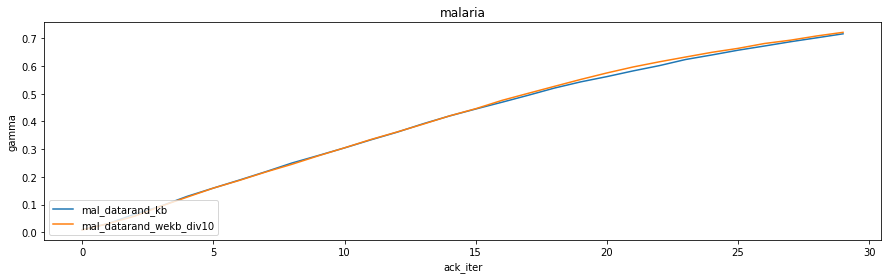

In [394]:
cs.plot_data_vs_ack_iter(
    200,
    filenames,
    'avg_seeds',
    'gamma',
    lambda x : x['idx_frac'][0].item(),
    30,
    arrs,
    to_eval,
    legend_loc=3,
)

In [ ]:
cs.plot_data_vs_ack_iter(
    10,
    filenames[0:15],
    'avg_seeds',
    'gamma',
    lambda x : x['best_gamma'] if x['best_gamma'] is not None else 0,
    30,
    arrs,
    to_eval,
    legend_loc=3,
)

In [ ]:
ack_iter = 0
for filename in filenames:
    print(filename)
    for batch_size in batches:
        for experiment in to_eval:
            best_value = 0
            num_used = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                best_value += stats[filename][batch_size][ack_iter]['logging'][9].item()
            if num_used > 0:
                best_value = best_value/num_used
                print(arrs[experiment][1] + ":", best_value, ";", str(num_used), "samples")

In [ ]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

avg = True

for prop in test_properties[1:2]:
    for filename in filenames[0:1]:
        print(filename)
        for batch_size in batches:
            for experiment in arrs:
                plt.figure(figsize=(15, 4))
                plt.subplot(121)
                prop_list = np.array([0.]*num_acks)
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        prop_list += np.array([stats[filename][batch_size][i][prop][0].item() for i in range(num_acks)])
                    else:
                        prop_list = [stats[filename][batch_size][i][prop][0].item() for i in range(num_acks)]
                    if not avg:
                        plt.plot(prop_list)
                if avg:
                    plt.plot(prop_list/num_used)
                plt.title(arrs[experiment][1] + "; " + prop + "; all")
                plt.subplot(122)
                prop_list = np.array([0.]*num_acks)
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        prop_list += np.array([stats[filename][batch_size][i][prop][1].item() for i in range(num_acks)])
                    else:
                        prop_list = [stats[filename][batch_size][i][prop][1].item() for i in range(num_acks)]
                    if not avg:
                        plt.plot(prop_list)
                if avg:
                    plt.plot(prop_list/num_used)
                plt.title(arrs[experiment][1] + "; " + prop + "; top 10%")

In [ ]:
ack_iter = 0
for filename in filenames[2:3]:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                prop_list = stats[filename][batch_size][ack_iter]['logging'][-1].numpy()
                plt.plot(prop_list)
                plt.title(arrs[experiment][1] + "; " + str(ack_iter))

In [28]:
to_eval = [
    #'top_val_none_ucb_g0.0_',
    'top_val_none_ucb_maxstd_g01051020_',
    'top_val_none_ucb_g0.0_200epochs_last_',
    #'top_val_none_ucb_maxvar_g01051020_',
]

ARX_L343Q_R1_8mers.txt
BCL6_H676Y_R1_8mers.txt
CRX_E80A_R1_8mers.txt


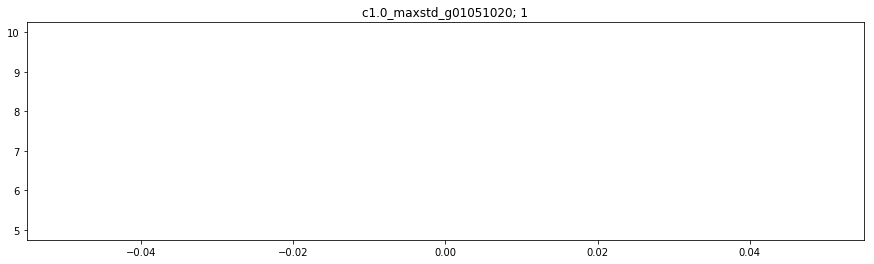

<Figure size 1080x288 with 0 Axes>

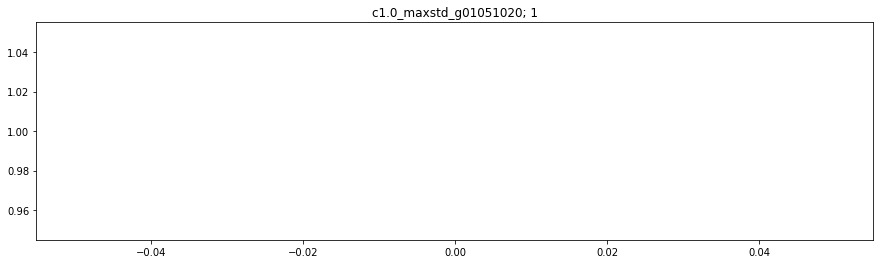

<Figure size 1080x288 with 0 Axes>

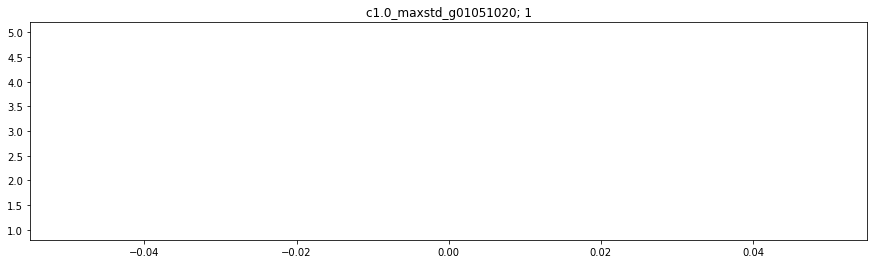

<Figure size 1080x288 with 0 Axes>

In [43]:
ack_iter = 1
for filename in filenames[:3]:
    print(filename)
    for batch_size in batches:
        for experiment in to_eval:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                #prop_list = stats[filename][batch_size][ack_iter]['logging'][5].numpy()
                prop_list = stats[filename][batch_size][ack_iter]['best_gamma']
                plt.plot(prop_list)
                plt.title(arrs[experiment][1] + "; " + str(ack_iter))

In [31]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

ack_iter = -1
for filename in filenames:
    print(filename)
    for batch_size in [10]:
        for experiment in to_eval:
            m = None
            num_used = 0
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                #m += stats[filename][batch_size][ack_iter]['test_std_list'][0].item()
                m2 = np.array([
                    np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][0].item(),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][1].item(),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][2].item()
                ])
                if m is None:
                    m = m2
                else:
                    m += m2
            if num_used > 0:
                print(arrs[experiment][1], ":", m/num_used, ";", num_used, "samples")

ARX_L343Q_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.9703925] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9711157] ; 10 samples
BCL6_H676Y_R1_8mers.txt
c1.0_maxstd_g01051020 : [1.] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9940775] ; 10 samples
CRX_E80A_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.5894803] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9260233] ; 10 samples
EGR2_D383Y_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.36053544] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9321119] ; 10 samples
ESX1_K193R_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.9648775] ; 10 samples
c1.0_g0.0_200epochs_last : [0.92595255] ; 10 samples
FOXC1_F112S_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.9920701] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9971632] ; 10 samples
GFI1B_A204T_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.814147] ; 10 samples
c1.0_g0.0_200epochs_last : [0.93335307] ; 10 samples
GFI1_L400F_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.6895327] ; 10 samples
c1.0_g0.0_200epochs_last : [0.7775618] ; 10 samples
HESX1_

In [43]:
num_labels = 32897

In [79]:
to_eval = [
    'take_log_none_ucb_c1.0_g0.0_',
    #'take_log_none_ucb_c2.0_g0.0_',
    'take_log_none_ucb_c1.0_g5.0_',
    'take_log_none_ucb_c1.0_g10.0_',
    'take_log_none_ucb_c1.0_g20.0_',
]

to_eval = [
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_',
    'take_log_none_ucb_num_acks_30_c1.0_g5.0_',
    'take_log_none_ucb_num_acks_30_c1.0_g10.0_',
]

In [81]:
num_acks = 30

In [240]:
to_eval = {
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_': 'Normal',
    'take_log_none_ucb_num_acks_30_c1.0_maxvar_' : 'MOD',
    'take_log_none_ucb_num_acks_30_c1.0_mincorr_' : 'MOD2',
}

to_eval = {
    'take_log_none_ucb_ntest' : 'Normal',
}

In [52]:
to_eval = [
    #'top_val_none_ucb_g0.0_',
    'top_val_none_ucb_g0.0_modelseed',
    #'top_val_none_ucb_maxstd_g01051020_',
    #'top_val_none_ucb_g0.0_200epochs_last_',
    #'top_val_none_ucb_maxvar_g01051020_',
]

/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


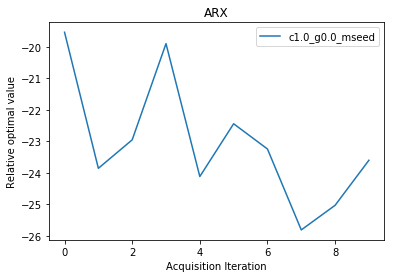

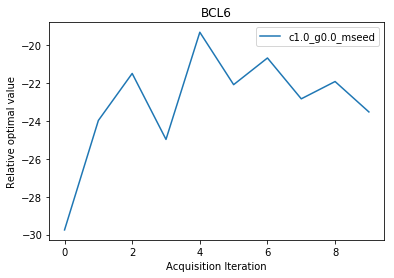

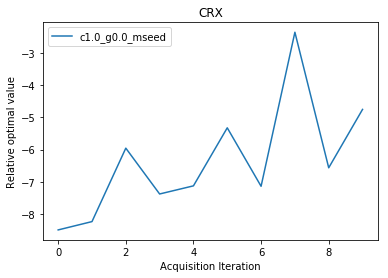

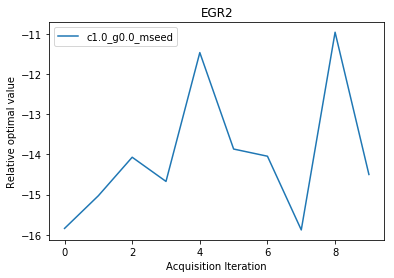

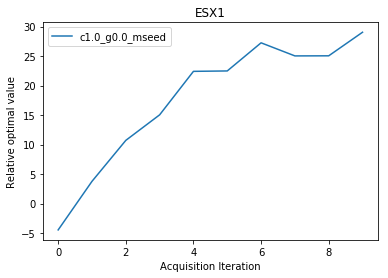

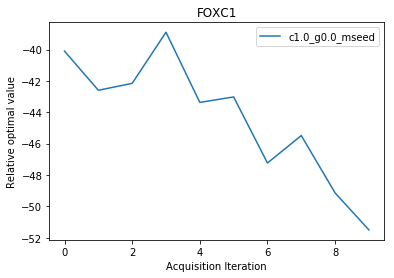

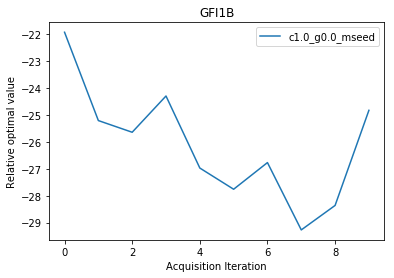

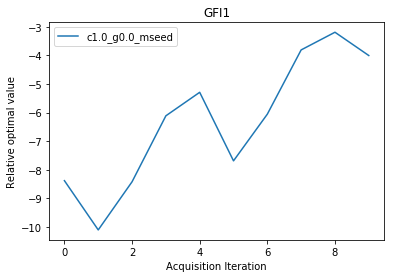

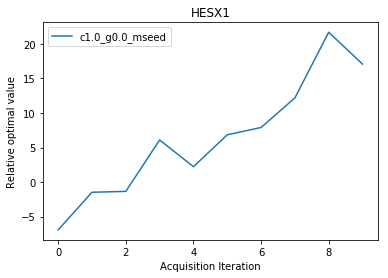

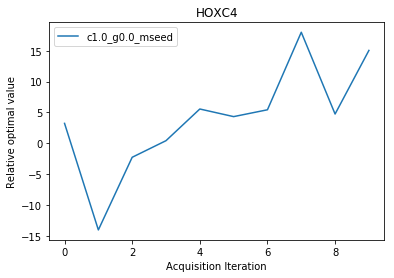

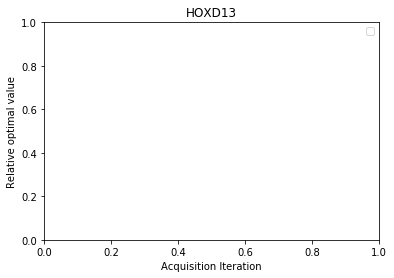

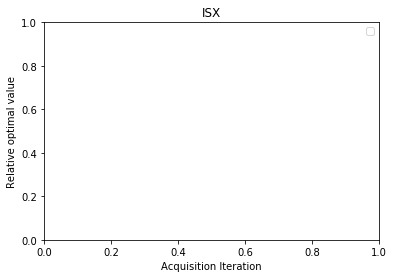

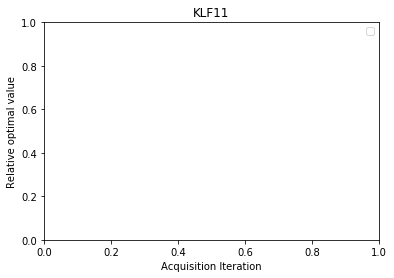

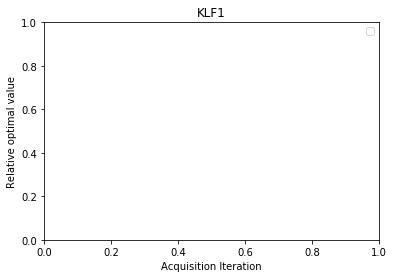

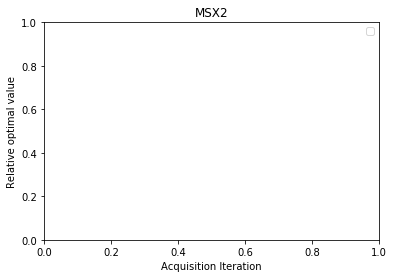

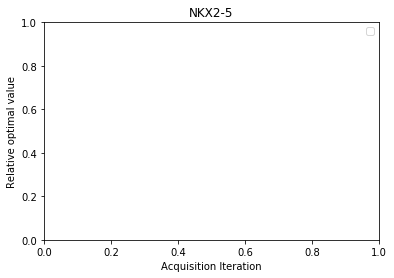

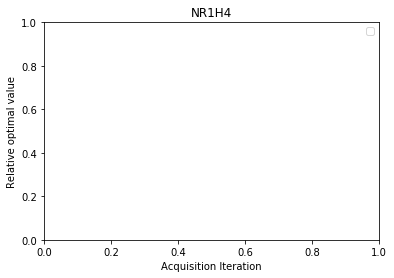

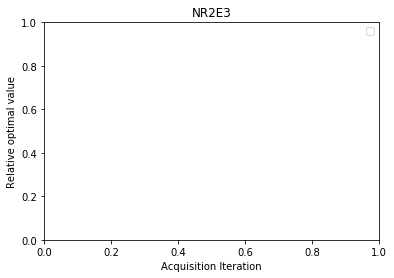

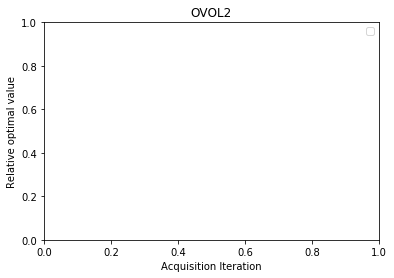

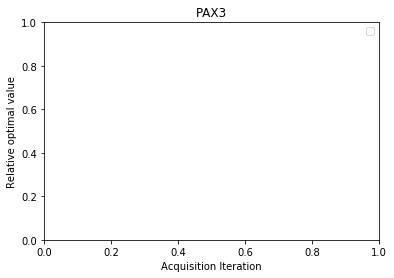

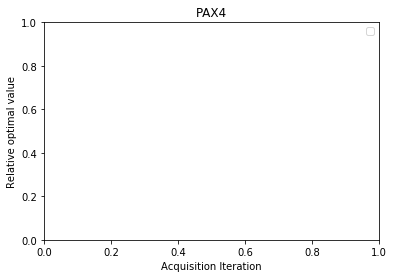

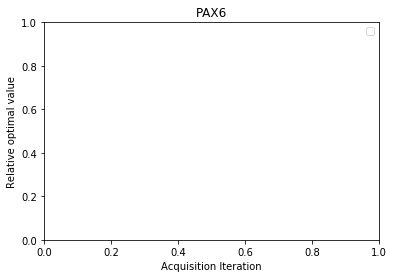

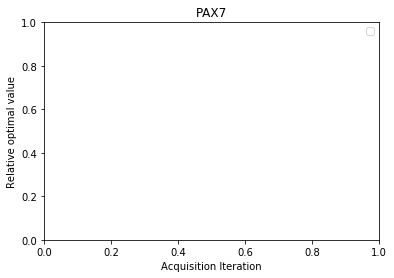

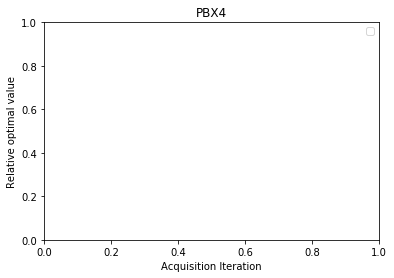

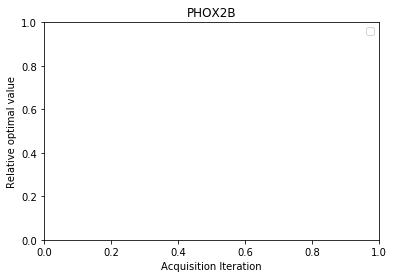

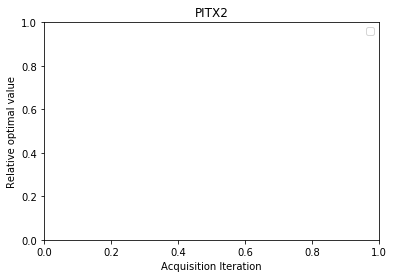

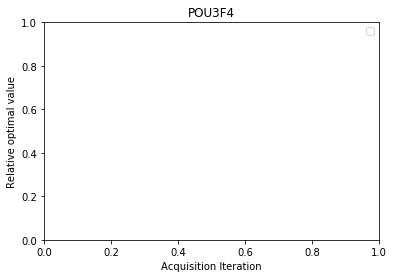

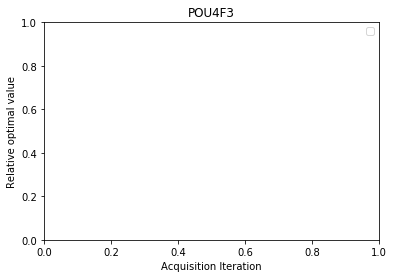

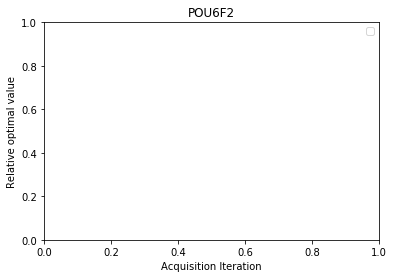

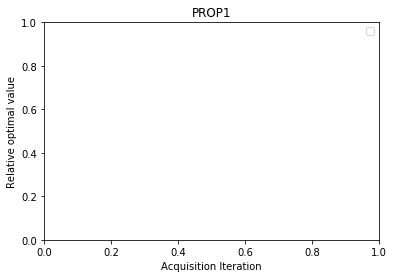

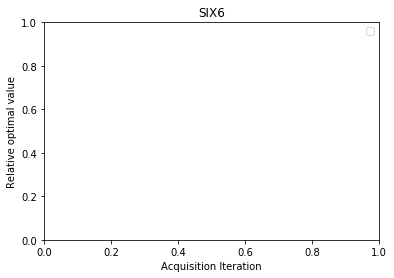

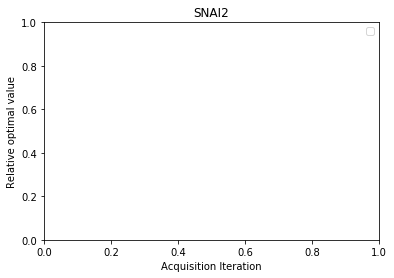

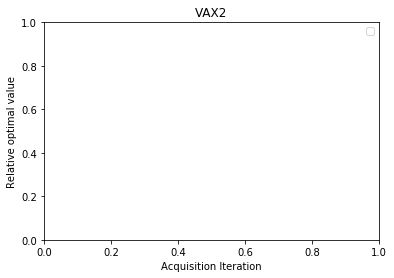

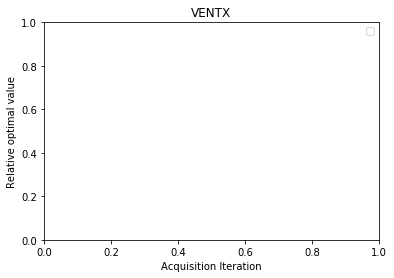

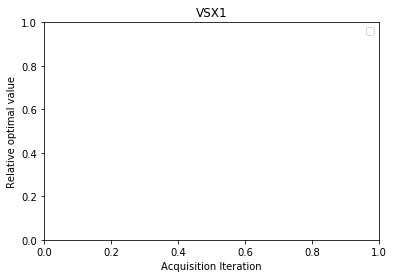

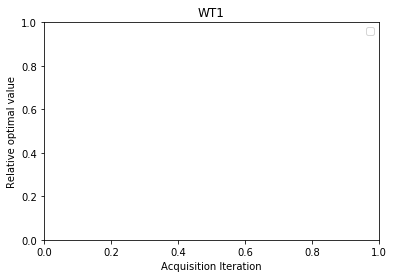

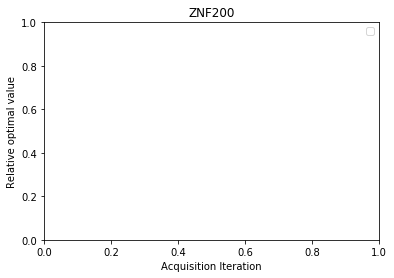

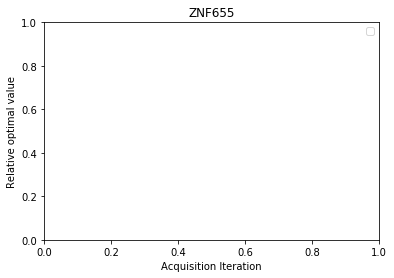

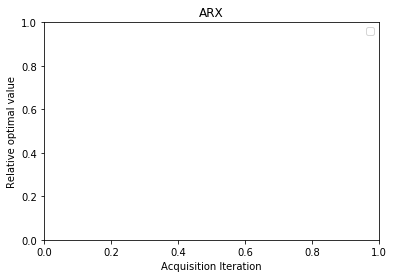

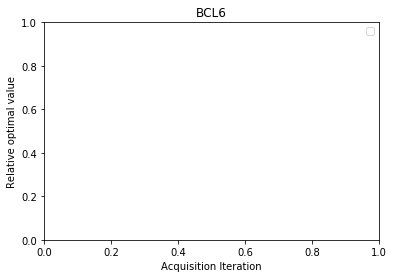

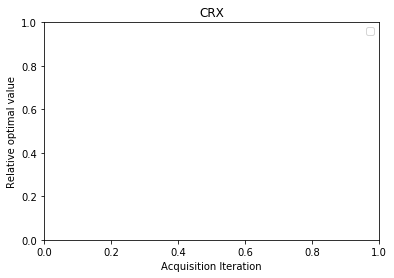

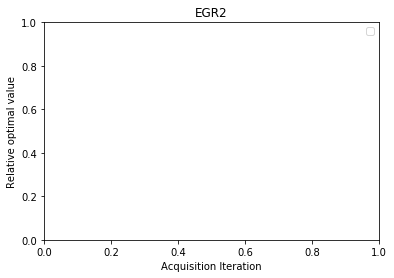

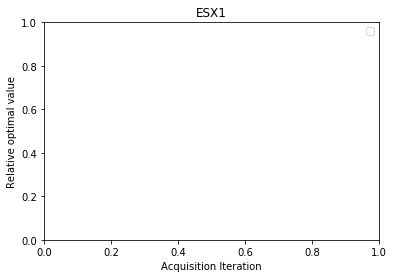

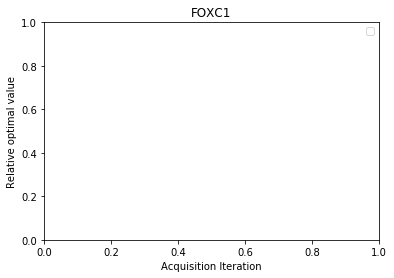

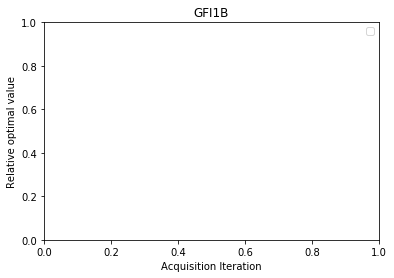

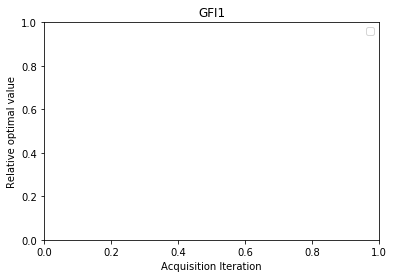

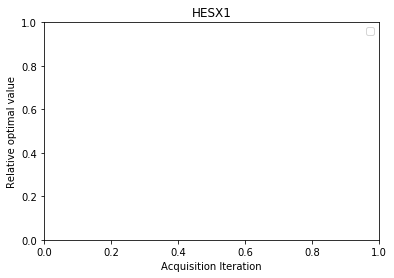

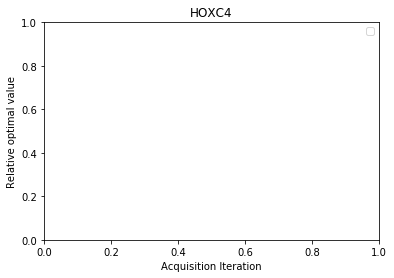

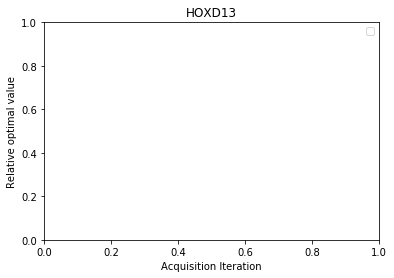

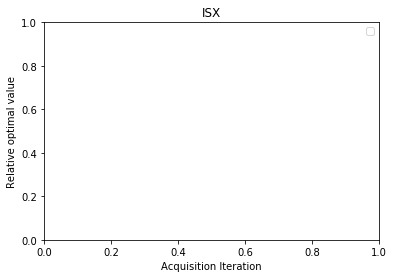

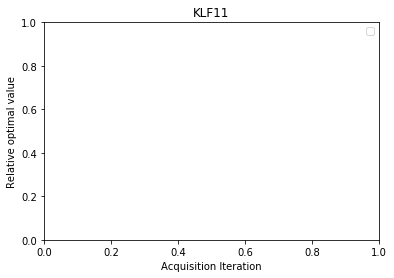

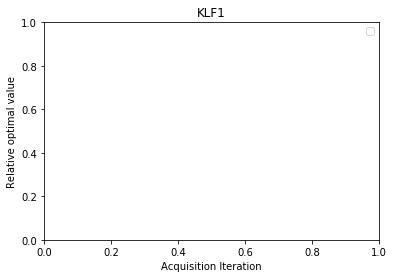

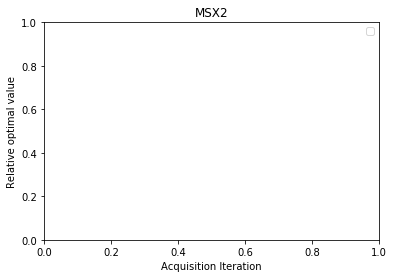

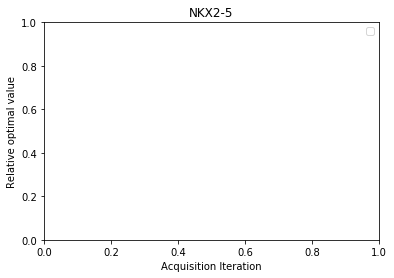

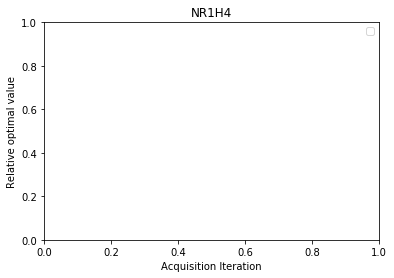

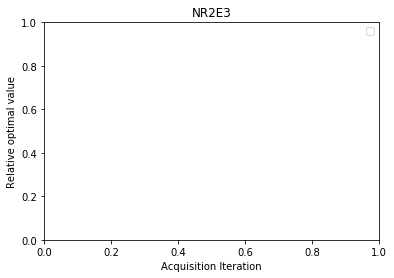

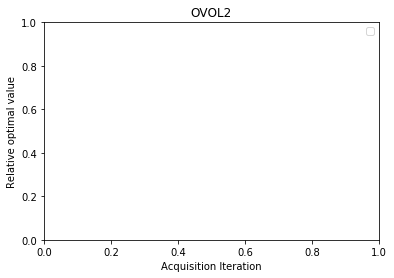

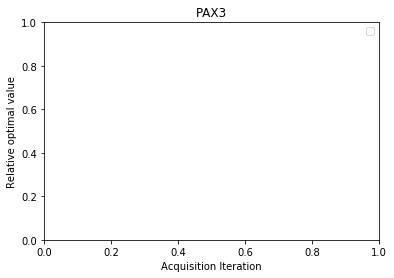

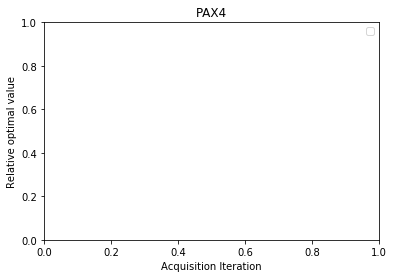

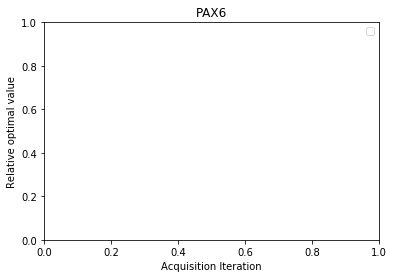

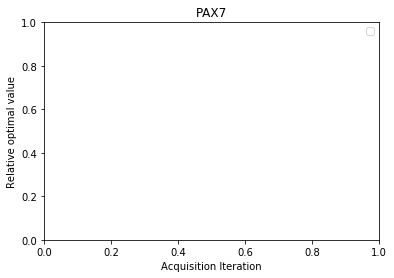

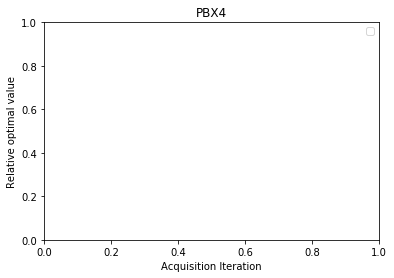

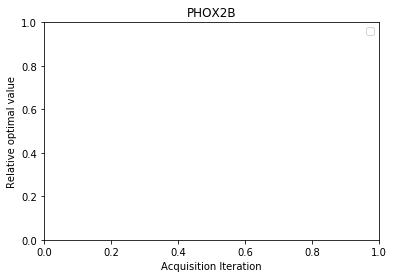

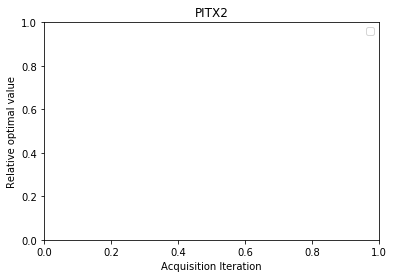

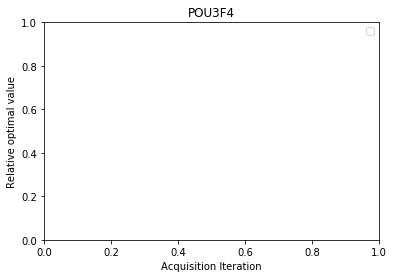

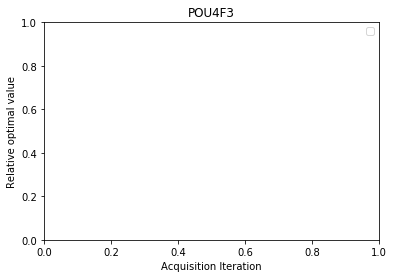

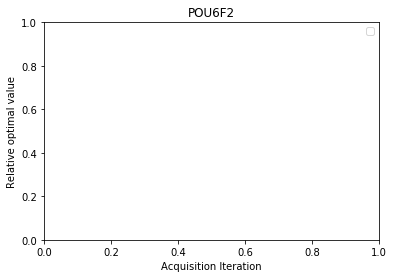

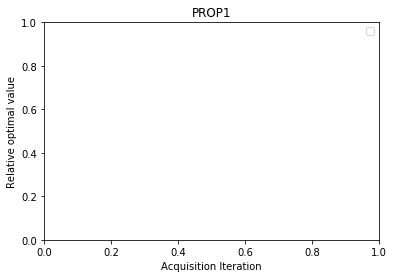

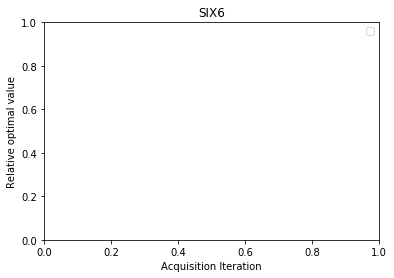

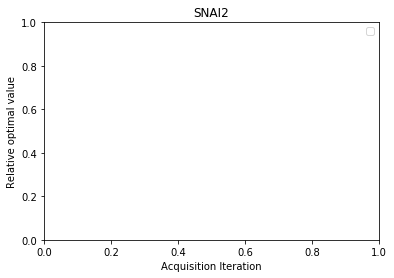

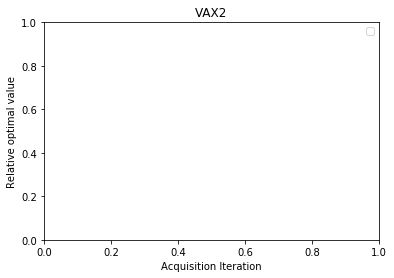

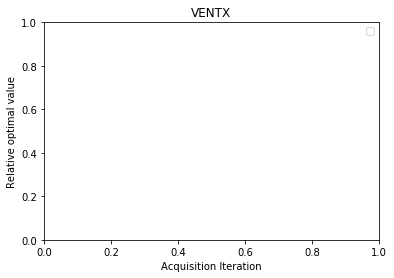

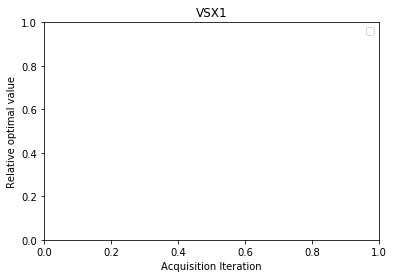

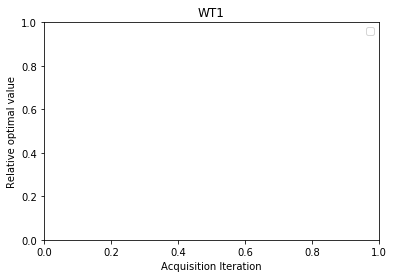

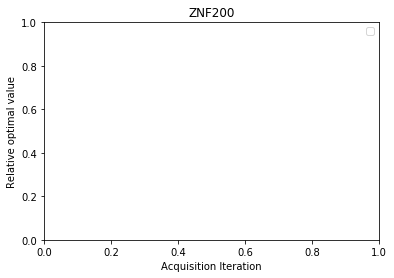

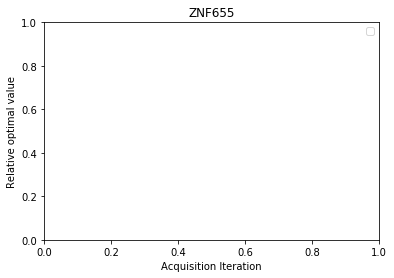

In [53]:
avg = True
num_acks = 10

for batch_size in batches:
    for filename in filenames:
        if avg:
            plt.figure(figsize=(6, 4))
            legend = []
        for experiment in to_eval:
            if not avg:
                plt.figure(figsize=(15, 4))
            prop_list = []
            num_used = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                if len(stats[filename][batch_size]) < num_acks:
                    continue
                num_used += 1
                if avg:
                    #prop_list += [np.array([np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]) for ack_iter in range(num_acks)])]
                    #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['idx_frac'][0]) for ack_iter in range(num_acks)])]
                    #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][0][-4]) for ack_iter in range(num_acks)])]
                    prop_list += [np.array([(stats[filename][batch_size][ack_iter]['logging'][0][8]) for ack_iter in range(num_acks)])]
                else:
                    prop_list = [(stats[filename][batch_size][ack_iter]['ack_labels'].max()) for ack_iter in range(num_acks)]
                    prop_list = [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][0][-4]) for ack_iter in range(num_acks)])]
                if not avg:
                    plt.plot(prop_list)
            if avg and num_used > 0:
                prop_list = np.stack(prop_list, axis=0)
                plt.plot(np.median(prop_list, axis=0))
                legend += [arrs[experiment][1]]
            elif not avg:
                plt.title(arrs[experiment][1] + "; " + str(batch_size) + "; all")
        if avg:
            plt.legend(legend)
            plt.xlabel('Acquisition Iteration')
            plt.ylabel('Relative optimal value')
            #plt.title(filename + "; " + str(batch_size) + "; all")
            plt.title(filename.split("_")[0])

/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


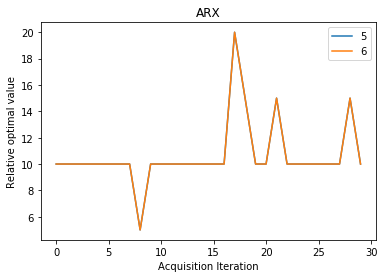

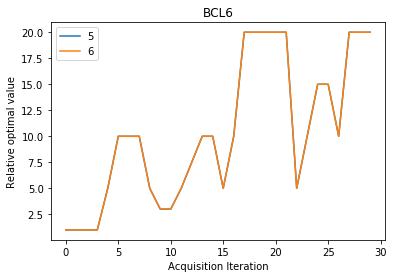

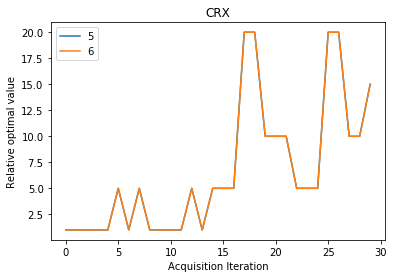

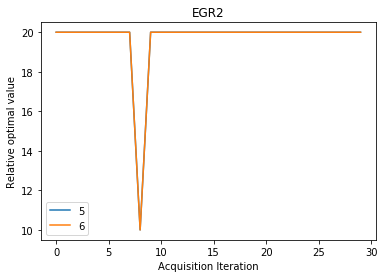

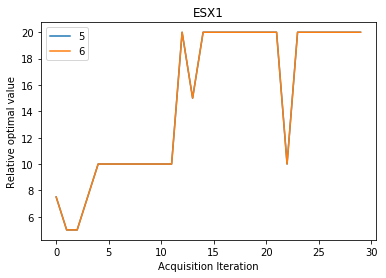

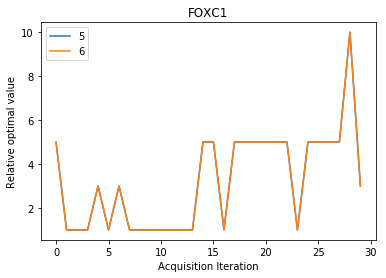

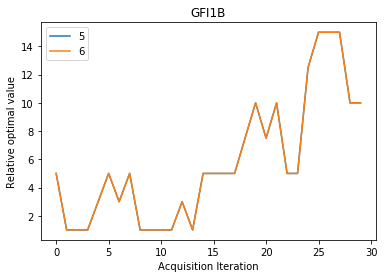

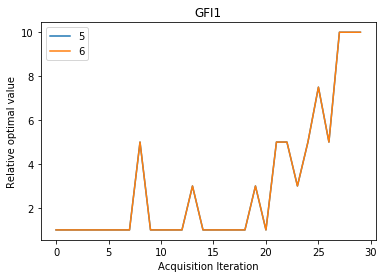

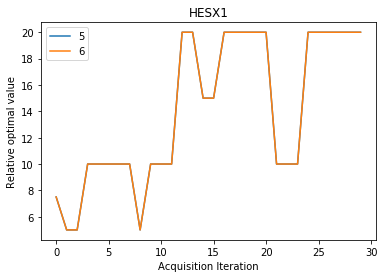

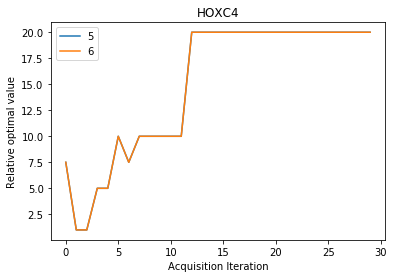

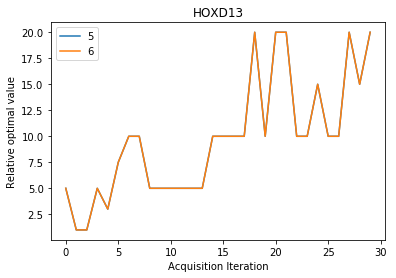

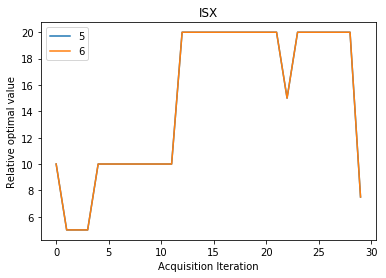

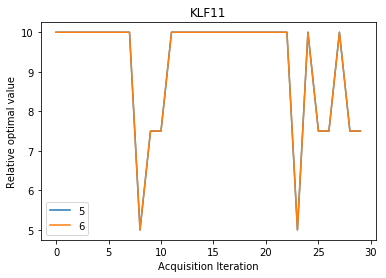

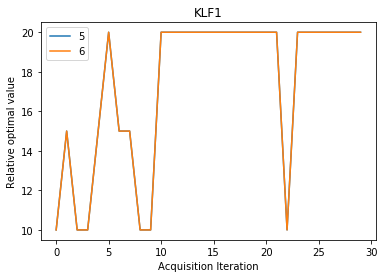

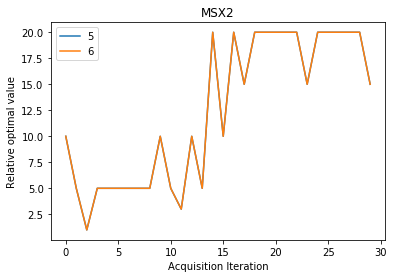

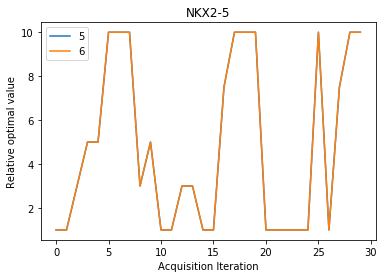

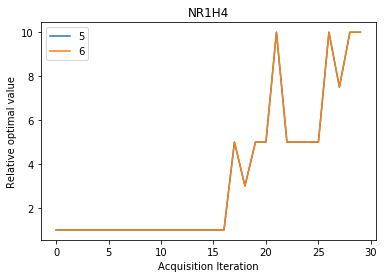

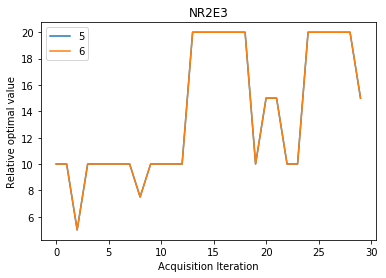

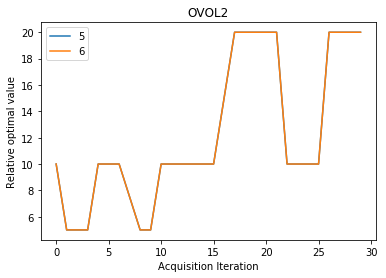

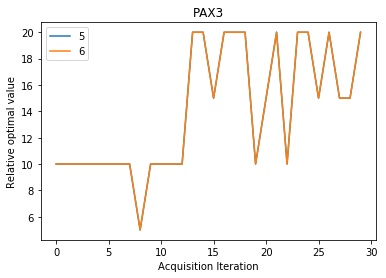

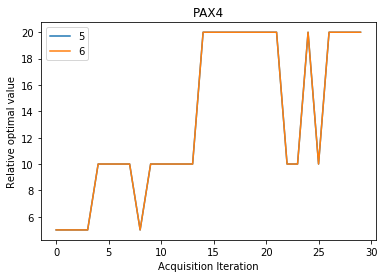

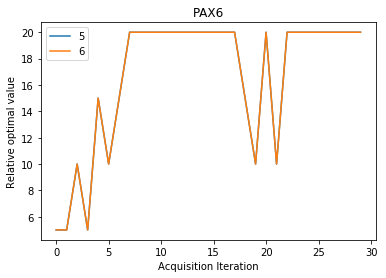

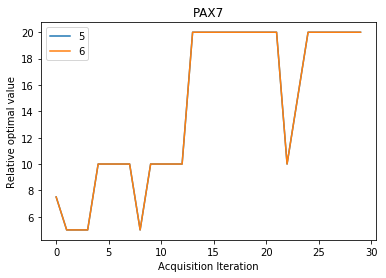

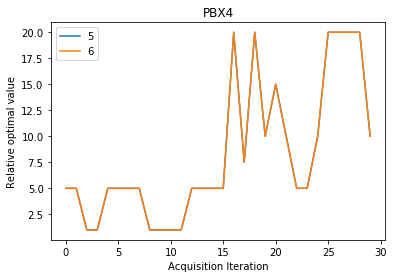

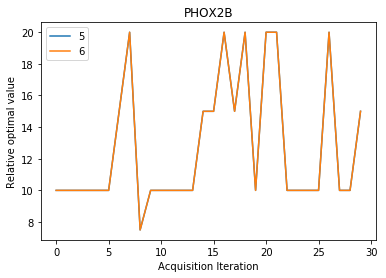

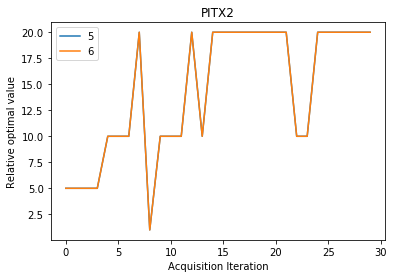

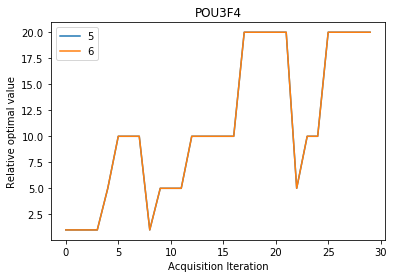

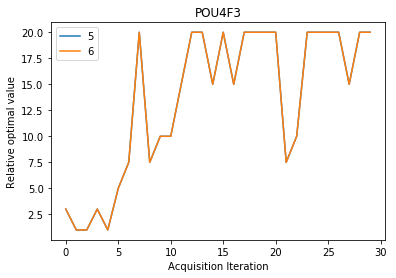

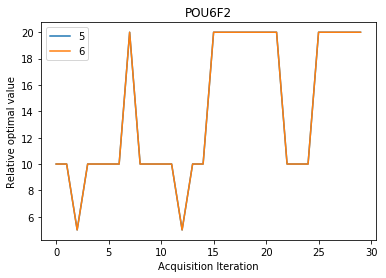

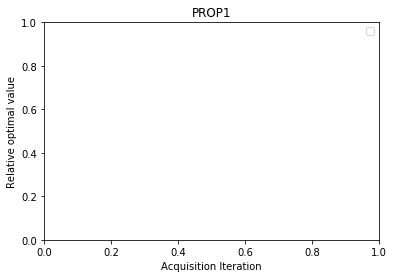

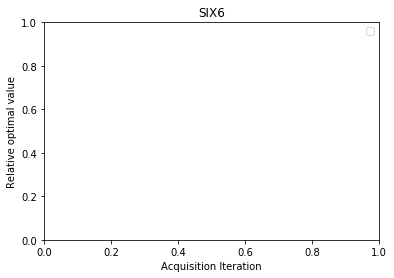

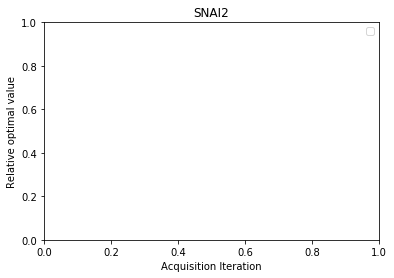

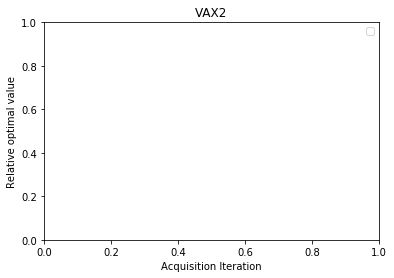

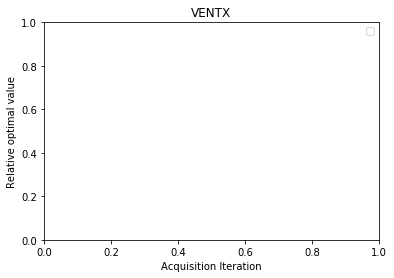

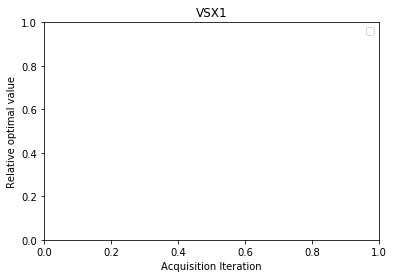

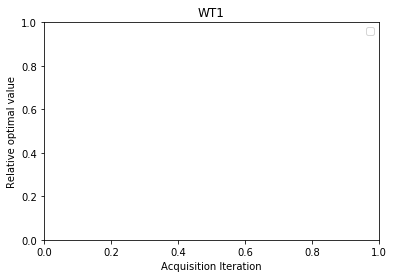

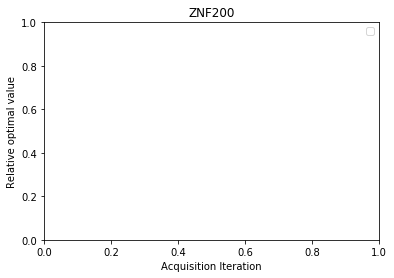

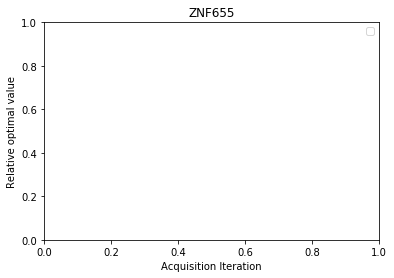

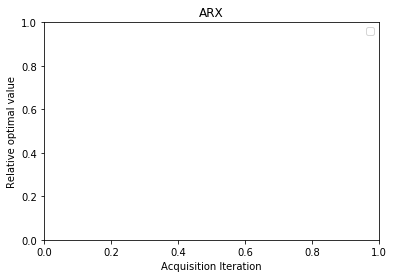

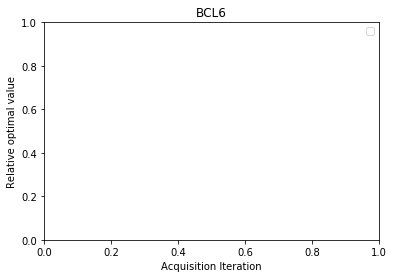

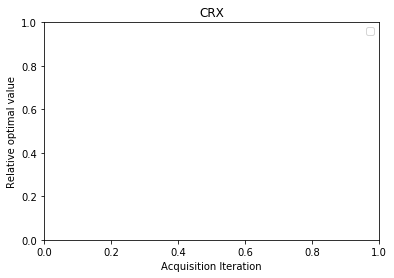

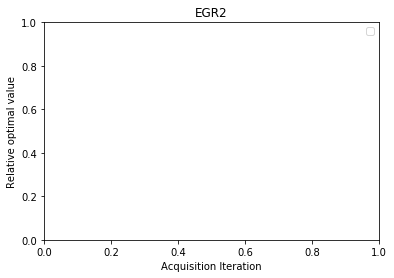

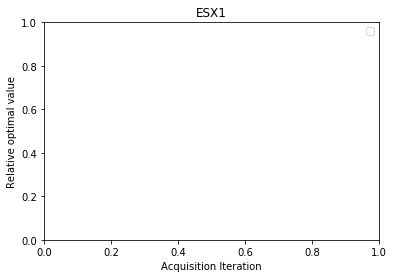

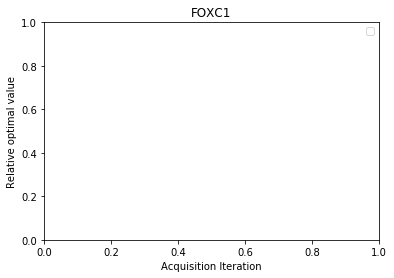

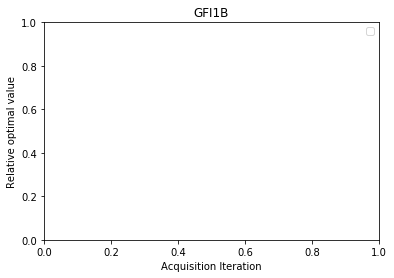

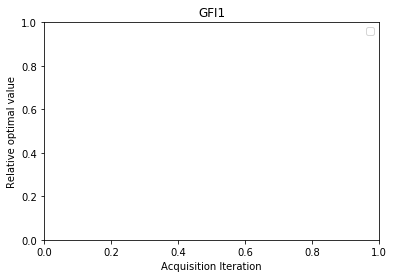

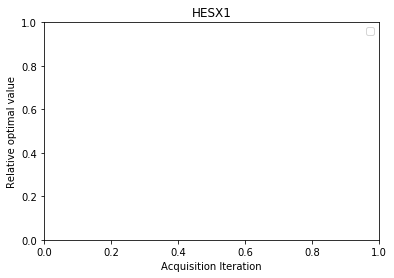

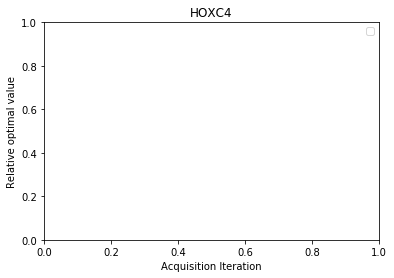

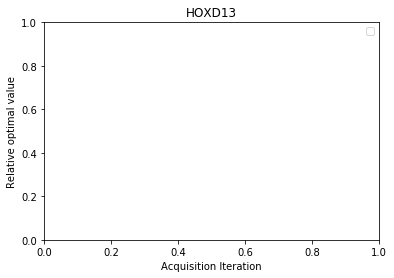

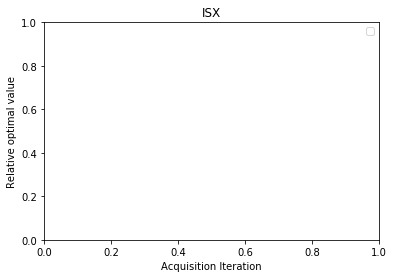

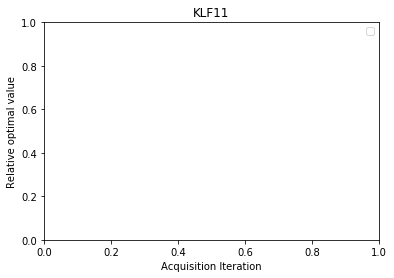

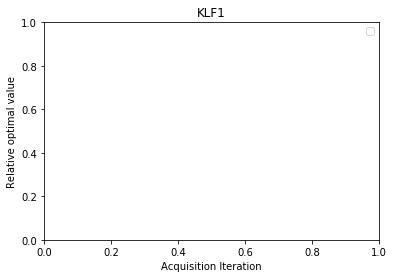

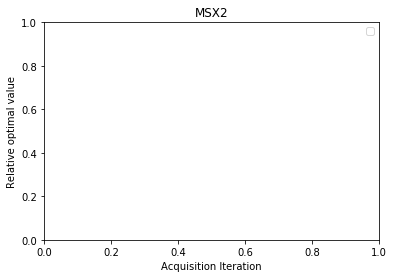

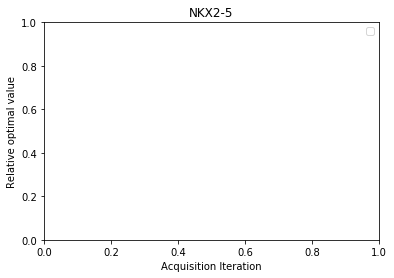

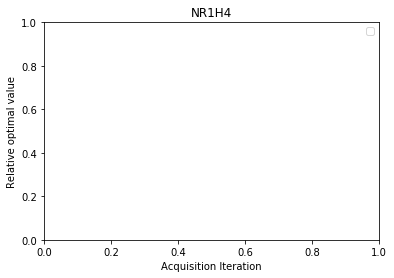

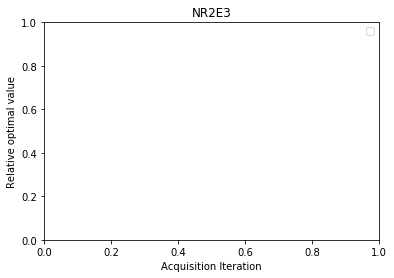

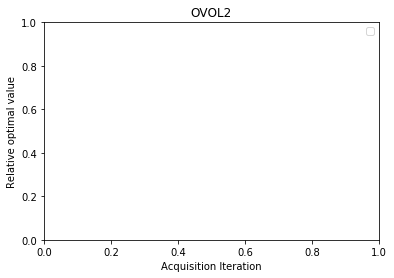

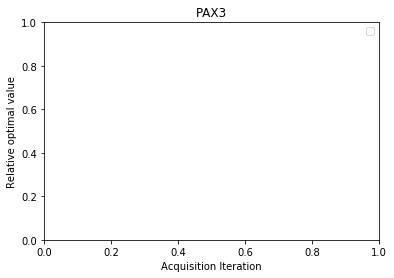

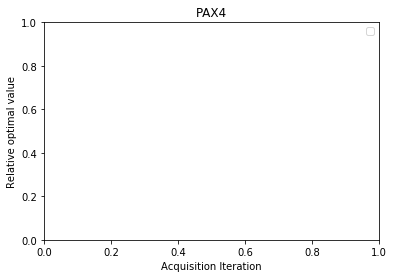

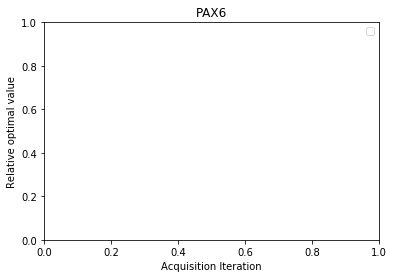

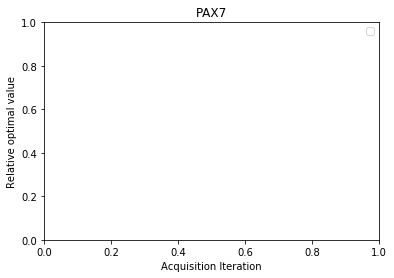

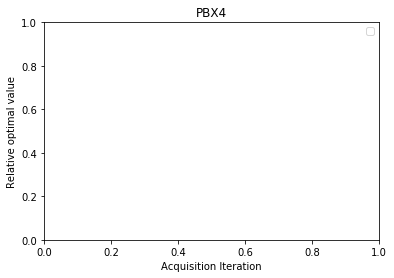

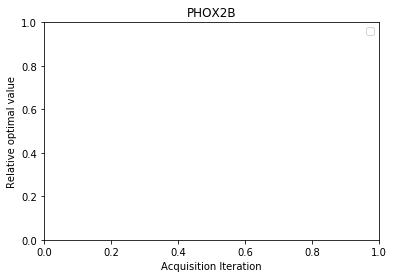

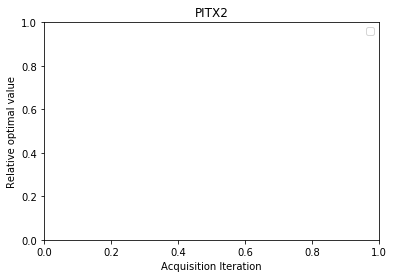

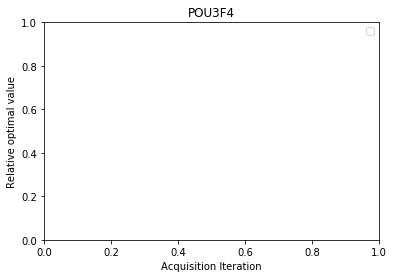

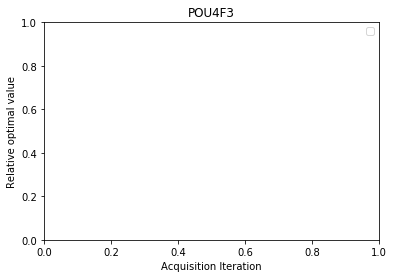

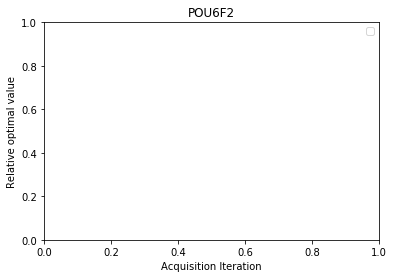

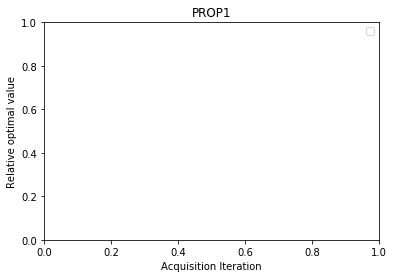

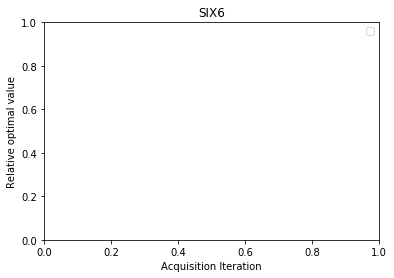

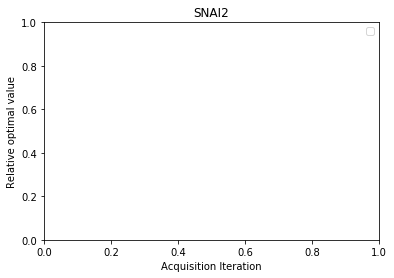

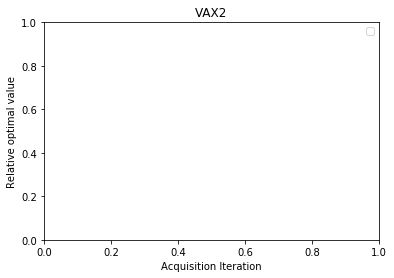

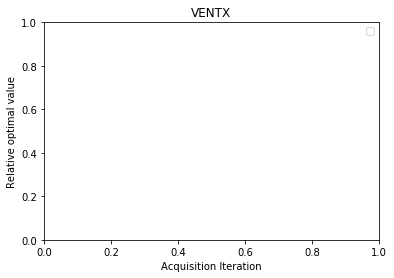

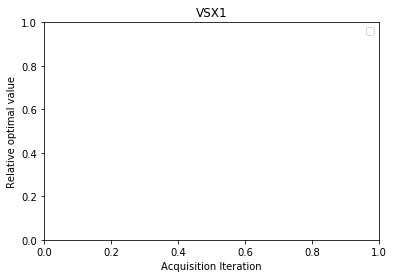

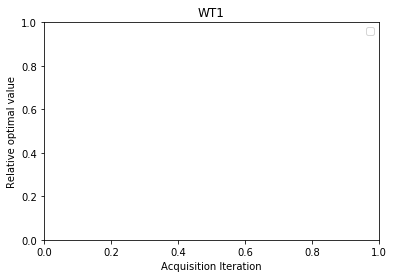

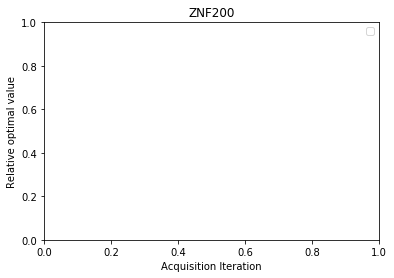

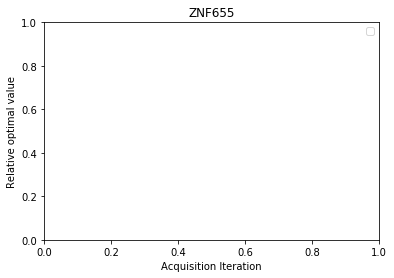

In [44]:
avg = True

for batch_size in batches:
    for filename in filenames:
        if avg:
            plt.figure(figsize=(6, 4))
            legend = []
        for experiment in to_eval:
            if not avg:
                plt.figure(figsize=(15, 4))
                
            for prop_i in [5, 6]:
                prop_list = []
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        #prop_list += [np.array([np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]) for ack_iter in range(num_acks)])]
                        #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['idx_frac'][0]) for ack_iter in range(num_acks)])]
                        #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][1][prop_i].item()) for ack_iter in range(num_acks)])]
                        prop_list += [np.array([(stats[filename][batch_size][ack_iter]['best_gamma']) for ack_iter in range(num_acks)])]
                    else:
                        prop_list = [(stats[filename][batch_size][ack_iter]['ack_labels'].max()) for ack_iter in range(num_acks)]
                        prop_list = [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][1][prop_i].item()) for ack_iter in range(num_acks)])]
                    if not avg:
                        plt.plot(prop_list)
                if avg and num_used > 0:
                    prop_list = np.stack(prop_list, axis=0)
                    plt.plot(np.median(prop_list, axis=0))
                    legend += [str(prop_i)]
                elif not avg:
                    plt.title(arrs[experiment][1] + "; " + str(batch_size) + "; all")
        if avg:
            plt.legend(legend)
            plt.xlabel('Acquisition Iteration')
            plt.ylabel('Relative optimal value')
            #plt.title(filename + "; " + str(batch_size) + "; all")
            plt.title(filename.split("_")[0])

Text(0, 0.5, 'Relative optimal value')

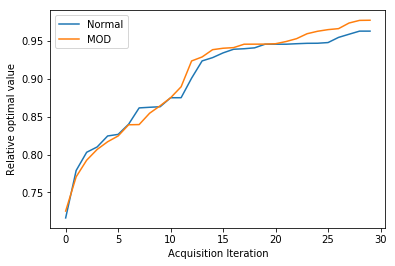

In [178]:
avg = True

plt.figure(figsize=(6, 4))
legend = []
for experiment in to_eval:
    prop_list = []
    for batch_size in [10]:
        for filename in filenames:
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                if len(stats[filename][batch_size]) < num_acks:
                    continue
                prop_list += [np.array([np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]) for ack_iter in range(num_acks)])]
                #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['idx_frac'][0]) for ack_iter in range(num_acks)])]
    prop_list = np.stack(prop_list, axis=0)
    plt.plot(np.median(prop_list, axis=0))
    #legend += [arrs[experiment][1]]
    legend += [to_eval[experiment]]
plt.legend(legend)
plt.xlabel('Acquisition Iteration')
plt.ylabel('Relative optimal value')